In [185]:
import pandas as pd
import numpy as np

### Loading the feature functions from CSV and trimming

In [186]:
df = pd.read_csv("features/ff_valence_all.csv", na_values=[""])


# Save to a CSV file
molecules = df['Mol'].values


molecules = molecules
molecules

array(['LiH', 'NaH', 'KH', 'RbH', 'CsH', 'CsCl', 'LiCl', 'CuI', 'LiF',
       'ZnS', 'CoO2', 'LiCoO2', 'Mg', 'Na', 'Ca', 'Li', 'Ni', 'Mn',
       'SnS2', 'LiSnS2'], dtype=object)

### Size Modification and adding parameters to Data Frame

In [187]:
df

,Mol,Pol_C,Pol_A,RadV_C,RadV_A,CN_C,CN_A,Ion_C,Ion_A,EA_C,f1,f2,f3,f4
0,LiH,164.10,4.51,133,32,6,6,5.3920,13.590,0.7540,1163.0000,85.3197,7.5916,3.0000
1,NaH,162.70,4.51,155,32,6,6,5.1390,13.590,0.7540,1608.0000,186.1052,7.5916,3.0000
2,KH,289.70,4.51,196,32,6,6,4.3410,13.590,0.7540,4984.5000,338.0207,7.5916,3.0000
3,RbH,319.80,4.51,210,32,6,6,4.1770,13.590,0.7540,6138.7755,476.2591,7.5916,3.0000
4,CsH,400.60,4.51,232,32,6,6,3.8490,13.590,0.7540,9330.7298,649.0924,7.5916,3.0000
5,CsCl,400.60,14.60,232,99,8,8,3.8490,12.960,3.6170,9330.7298,649.0924,92.3460,90.3985
6,LiCl,164.10,14.60,133,99,6,6,5.3920,12.960,3.6170,1163.0000,85.3197,92.3460,90.3985
7,CuI,46.50,32.90,112,133,4,4,7.7260,10.451,3.0590,337.1808,174.9900,351.9667,358.4995
8,LiF,164.10,3.74,133,64,6,6,5.3920,17.423,3.3390,1163.0000,85.3197,9.6900,7.1341
9,ZnS,38.67,19.40,118,103,4,4,9.3940,10.360,0.0000,340.5213,153.4500,134.0060,125.8100


In [188]:

%store -r res
res

[14.13330815446956,
 14.081369567351956,
 14.034265054162475,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 5.560246204451975,
 17.144355598718082,
 25.027177715806825,
 22.814559268959076,
 25.719392847659723,
 10.553895436793855,
 15.857470042410599,
 1.096295429346349,
 3.966428089692199]

In [189]:
# df = df.iloc[:10,0:]


## always inverse of EN_A

# df['Sum_EN'] = df['EN_C'] + df['EN_A']
# df['Diff_EN'] = abs(df['EN_A'] - df['EN_C'])
# # df['Diff_rad'] = df['RadV_A'] - df['RadV_C']


df['Sum_ion'] = df['Ion_C'] + df['Ion_A']
df['Sum_ion_cubed'] = df['Sum_ion']*df['Sum_ion']*df['Sum_ion']

df['Abs_diff_ion'] = abs(df['Ion_C'] - df['Ion_A'])
df['Abs_diff_ion_cubed'] = df['Abs_diff_ion']*df['Abs_diff_ion']*df['Abs_diff_ion']

# df.drop(columns=['Abs_diff_ion','Sum_ion'])

# df['Sum_EN'] = df['EN_A'] + df['EN_C']
# df['Sum_EN_cubed'] = df['Sum_EN']*df['Sum_EN']*df['Sum_EN']

# df['Abs_diff_EN'] = abs(df['EN_A'] - df['EN_C'])
# df['Abs_diff_EN_cubed'] = df['Abs_diff_EN']*df['Abs_diff_EN']*df['Abs_diff_EN']

# df.drop(columns=['Sum_EN','Abs_diff_EN'])

# df['Sum_pol'] = df['Pol_C'] + df['Pol_A']
# df['Sum_pol_cubed'] = df['Sum_pol']*df['Sum_pol']*df['Sum_pol']

# df['Abs_diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])
# df['Abs_diff_pol_cubed'] = df['Abs_diff_pol']*df['Abs_diff_pol']*df['Abs_diff_pol']


# Adding sqrt values for each column
# for col in df.columns:
#     # Make sure the column is numeric before applying sqrt
#     if pd.api.types.is_numeric_dtype(df[col]):
#         # df[f'{col}_sqrt'] = np.sqrt(abs(df[col]))
#         # df[f'{col}_squared'] = np.square(df[col])
#         df.drop(columns=[col], inplace=True)

# df = df.drop(columns=['EN_C'])

# df['sum_ion'] = df['Ion_C'] + df['Ion_A']
# # df['diff_ion'] = df['Ion_C'] - df['Ion_A']
# df['diff_pol'] = abs(df['Pol_C'] - df['Pol_A'])

# df = df[['EA_A's]]

# df = df[['Sum_ion_cubed','Abs_diff_ion_cubed','Sum_EN_cubed','Abs_diff_EN_cubed','EN_C','EN_A','Ion_C','Ion_A']]


df['Abs_diff_radV'] = abs(df['RadV_A'] - df['RadV_C'])
df['Abs_diff_radV'] = df['Abs_diff_radV']*df['Abs_diff_radV']
# df['Abs_diff_radI'] = abs(df['RadI_A'] - df['RadI_C'])

df['Sum_radV'] = 0.5*df['RadV_C']+df['RadV_A']
# df['Sum_radV'] = df['Sum_radV']*df['Sum_radV']
df['Diff_radV'] = np.sqrt((df['RadV_C'] +df['RadV_A'])/2)


df['Exp_rad'] = 1/np.exp(-(df['Sum_radV'])/100000) 
# df['Sum_radI'] = df['RadI_A'] + df['RadI_C']

df['Sqrt_Sum_pol'] = np.power(df['Pol_C']+1.5*df['Pol_A'],(1/2))

df.shape

(20, 23)

In [190]:
## combintaions of f1 f2 f2 f4
# df['sum_cat'] = df['f1'] + df['f2']
# df['sum_an'] = df['f3'] + df['f4']
# df['diff_cat'] = abs(df['f1'] - df['f2'])
# df['diff_an'] = abs(df['f3'] - df['f4'])

# # replace -1 with Null


# # Replace -1 in f3 with values from f1
# df['f3'] = df['f3'].where(df['f3'] != -1, df['f1'])

# # Replace -1 in f4 with values from f3-
# df['f4'] = df['f4'].where(df['f4'] != -1, df['f3'] - 1)


# df['rad_fac'] = -np.power(df['R_C']+df['R_A'],6)

# df['ratio_cat'] = df['f1']/df['f2']
# df['ratio_an'] = df['f3']/df['f4']

In [191]:
df = df[['Sum_radV','Sqrt_Sum_pol',]]
# df = df[['f1','f3','rad_fac',]]

In [192]:

%store -r res

res

[14.13330815446956,
 14.081369567351956,
 14.034265054162475,
 12.926169405830962,
 12.27212198878638,
 3.230739472566894,
 5.121300394981286,
 3.5739198265668453,
 4.715887333726234,
 2.499975609761724,
 1.8052940594169544,
 5.560246204451975,
 17.144355598718082,
 25.027177715806825,
 22.814559268959076,
 25.719392847659723,
 10.553895436793855,
 15.857470042410599,
 1.096295429346349,
 3.966428089692199]

### making the combinations

In [193]:
import itertools
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count

In [194]:
import itertools
import numpy as np
import pandas as pd

def generate_combinations_df(params_df, param_names):
    results = []

    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

    # Precompute invalid pairs (parameter and its inverse)
    invalid_pairs = {f"{name}^(-1)": name for name in param_names}
    invalid_pairs.update({name: f"{name}^(-1)" for name in param_names})

    # Generate all subsets of parameters (combinations)
    for r in range(1, len(combined_param_names) + 1):
        for subset_indices in itertools.combinations(range(len(combined_param_names)), r):

            subset_names = [combined_param_names[i] for i in subset_indices]

            # Skip invalid subsets early
            if any(invalid_pairs.get(name) in subset_names for name in subset_names):
                continue

            # Select the subset DataFrame
            subset = combined_params_df[subset_names]

            # Replace NaN values with 0
            subset = subset.fillna(0)

            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results


In [195]:
import itertools
import numpy as np
import pandas as pd

def generate_combinations_df(params_df, param_names, restricted_properties=None, restricted_to_inverses=None):
    if restricted_properties is None:
        restricted_properties = []
    if restricted_to_inverses is None:
        restricted_to_inverses = []

    results = []

    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

     # Precompute invalid pairs (parameter and its inverse)
    invalid_pairs = {f"{name}^(-1)": name for name in param_names}
    invalid_pairs.update({name: f"{name}^(-1)" for name in param_names})
    
    # Generate all subsets of parameters (combinations)
    for r in range(1, len(combined_param_names) + 1):
        for subset_indices in itertools.combinations(range(len(combined_param_names)), r):
            subset_names = [combined_param_names[i] for i in subset_indices]

            # Replace NaN values with 0
             # Skip invalid subsets early
            if any(invalid_pairs.get(name) in subset_names for name in subset_names):
                continue
            
            subset = combined_params_df[subset_names]
            subset = subset.fillna(0)

            # Check if both a parameter and its inverse are in the subset
            invalid = False
           
            # Exclude subsets containing restricted inverses
            for restricted in restricted_properties:
                if f"{restricted}^(-1)" in subset_names:
                    invalid = True
                    break

            # Ensure restricted properties only appear as inverses
            for restricted in restricted_to_inverses:
                if restricted in subset_names or (restricted not in param_names and f"{restricted}^(-1)" not in subset_names):
                    invalid = True
                    break

            if invalid:
                continue

            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))
            expr_str = " + ".join(subset_names)
            expr_val = subset.sum(axis=1)
            results.append((expr_str, expr_val))

    return results


In [196]:
import itertools
import numpy as np
import pandas as pd
from multiprocessing import Pool, cpu_count

def process_combinations_chunk(args):
    combined_params_df, combined_param_names, param_names, indices_chunk = args
    results = []

    for indices in indices_chunk:
        subset_names = [combined_param_names[i] for i in indices]
        subset = combined_params_df[subset_names]

        # Replace NaN values with 0
        subset = subset.fillna(0)

        # Check if both a parameter and its inverse are in the subset
        invalid = False
        for name in subset_names:
            if name.endswith("^(-1)") and name[:-5] in subset_names:
                invalid = True
                break
            elif name in param_names and f"{name}^(-1)" in subset_names:
                invalid = True
                break

        if not invalid:
            # Compute results for valid subsets
            expr_str = " * ".join(subset_names)
            expr_val = subset.prod(axis=1)
            results.append((expr_str, expr_val))

    return results

def generate_combinations_df_parallel(params_df, param_names):
    # Convert all parameter values to numeric, coercing errors to NaN
    params_df = params_df.apply(pd.to_numeric, errors='coerce')

    # Precompute inverses of all parameters
    params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)
    params_inv_df.columns = [f"{name}^(-1)" for name in param_names]

    # Combine original parameters and their inverses
    combined_params_df = pd.concat([params_df, params_inv_df], axis=1)
    combined_param_names = list(combined_params_df.columns)

    # Generate all subsets of parameter indices
    all_combinations = [
        indices for r in range(1, len(combined_param_names) + 1)
        for indices in itertools.combinations(range(len(combined_param_names)), r)
    ]

    # Divide all_combinations into chunks
    num_workers = min(cpu_count(), len(all_combinations))
    chunk_size = max(1, len(all_combinations) // num_workers)
    chunks = [all_combinations[i:i + chunk_size] for i in range(0, len(all_combinations), chunk_size)]

    print(f"Using {num_workers} workers to process {len(all_combinations)} combinations in {len(chunks)} chunks")

    # Prepare arguments for parallel processing
    args = [
        (combined_params_df, combined_param_names, param_names, chunk)
        for chunk in chunks
    ]

    # Use multiprocessing to process combinations in parallel
    with Pool(processes=num_workers) as pool:
        results = pool.map(process_combinations_chunk, args)

    # Flatten results
    flattened_results = [item for sublist in results for item in sublist]
    return flattened_results


### Restricted parameters

In [197]:
# df = df.iloc[:,1:]
df

,Sum_radV,Sqrt_Sum_pol
0,98.5,13.071534
1,109.5,13.017872
2,130.0,17.218159
3,137.0,18.071110
4,148.0,20.183285
5,215.0,20.554805
6,165.5,13.638182
7,189.0,9.790301
8,130.5,13.027279
9,162.0,8.232254


In [198]:
# numeretor = ['Ion_C','Ion_A']
# denomeretor = ['Abs_diff_pol','Sum_pol','Abs_diff_EN','Sum_EN']
numeretor = None
denomeretor = None

In [199]:

import os
import pandas as pd

takeSaved = False

all_expressions = []
expressions = []
# Define file name to save/load the results
cache_file = "cached_expressions.pkl"

if os.path.exists(cache_file) and takeSaved:
    # Load the cached results if they exist
    expressions = pd.read_pickle(cache_file)
    all_expressions = list(expressions.itertuples(index=False, name=None))
    print("Loaded cached expressions.")
else:
    # Perform the costly computation if cache does not exist
    print("Calculating expressions...")
    param_names = list(df.columns)
    all_expressions = generate_combinations_df(df.iloc[:,:], param_names, restricted_properties=numeretor, restricted_to_inverses=denomeretor)
    expressions = pd.DataFrame(all_expressions, columns=['Expression', 'Value'])

    # Save the results to cache
    expressions.to_pickle(cache_file)
    print("Expressions cached.")

# Print the shape of the expressions DataFrame
print(expressions.shape)


Calculating expressions...
Expressions cached.
(16, 2)


C:\Users\user\AppData\Local\Temp\ipykernel_8900\1368268208.py:17: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  params_inv_df = params_df.applymap(lambda x: np.power(float(x), -1) if pd.notnull(x) and x != 0 else np.nan)


In [200]:
expressions['Value'] = expressions['Value'] 
expressions.head()

,Expression,Value
0,Sum_radV,0 98.5 1 109.5 2 130.0 3 137....
1,Sum_radV,0 98.5 1 109.5 2 130.0 3 137....
2,Sqrt_Sum_pol,0 13.071534 1 13.017872 2 17.21815...
3,Sqrt_Sum_pol,0 13.071534 1 13.017872 2 17.21815...
4,Sum_radV^(-1),0 0.010152 1 0.009132 2 0.007692 3...


### Addition results to the combinations

In [201]:
values_dict = {expr_str: expr_val for expr_str, expr_val in all_expressions}
values = pd.DataFrame(values_dict)
values['res'] = res

### Finding Corelation

In [202]:

correlation = values.corr()

correlation.shape

(13, 13)

In [203]:
results=correlation['res'].abs().sort_values(ascending=False)
print(results.iloc[0:100])
top_vars = results.iloc[1:100].index

res                                  1.000000
Sum_radV * Sqrt_Sum_pol              0.717958
Sum_radV^(-1) + Sqrt_Sum_pol^(-1)    0.666654
Sqrt_Sum_pol^(-1)                    0.652271
Sqrt_Sum_pol                         0.648729
Sqrt_Sum_pol + Sum_radV^(-1)         0.648650
Sum_radV^(-1) * Sqrt_Sum_pol^(-1)    0.604210
Sum_radV + Sqrt_Sum_pol              0.556438
Sum_radV                             0.526172
Sum_radV + Sqrt_Sum_pol^(-1)         0.525981
Sum_radV^(-1)                        0.360800
Sqrt_Sum_pol * Sum_radV^(-1)         0.131743
Sum_radV * Sqrt_Sum_pol^(-1)         0.123289
Name: res, dtype: float64


In [204]:
filtered_expressions = [(name, values) for name, values in all_expressions if name in top_vars]

# To display the filtered results




### Final Results

In [205]:
results=correlation['res'].abs().sort_values(ascending=False)
print(results.iloc[0:200])
top_vars = results.iloc[1:200].index


res                                  1.000000
Sum_radV * Sqrt_Sum_pol              0.717958
Sum_radV^(-1) + Sqrt_Sum_pol^(-1)    0.666654
Sqrt_Sum_pol^(-1)                    0.652271
Sqrt_Sum_pol                         0.648729
Sqrt_Sum_pol + Sum_radV^(-1)         0.648650
Sum_radV^(-1) * Sqrt_Sum_pol^(-1)    0.604210
Sum_radV + Sqrt_Sum_pol              0.556438
Sum_radV                             0.526172
Sum_radV + Sqrt_Sum_pol^(-1)         0.525981
Sum_radV^(-1)                        0.360800
Sqrt_Sum_pol * Sum_radV^(-1)         0.131743
Sum_radV * Sqrt_Sum_pol^(-1)         0.123289
Name: res, dtype: float64


In [206]:
param = top_vars[10]

y = values[param]
x = values['res']

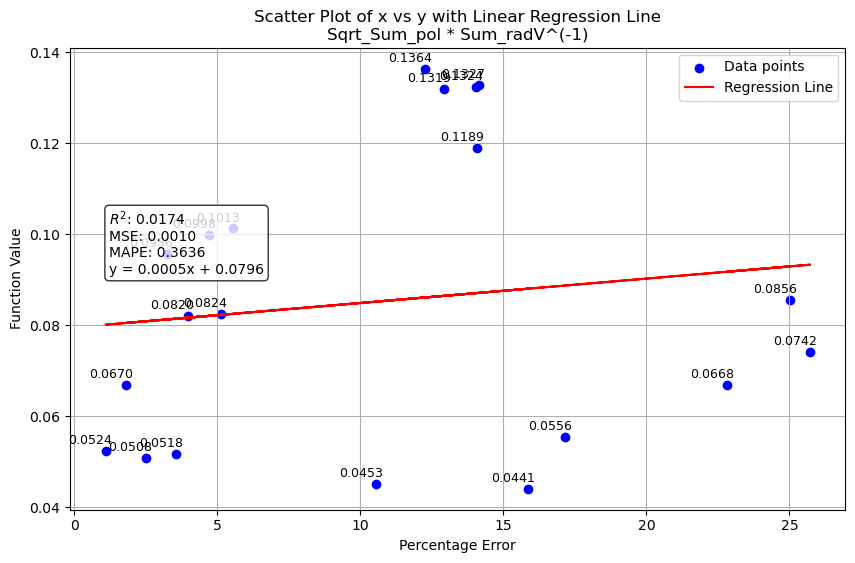

In [207]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Reshape x to a 2D array
x_reshaped = x.values.reshape(-1, 1)  # Convert x to a 2D array (n, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]  # model.coef_ gives the slope of the line
intercept = model.intercept_  # model.intercept_ gives the intercept

# Predict y values using the linear model
y_pred = model.predict(x_reshaped)

# Calculate R^2, MSE, and MAPE
r_squared = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)
mape = mean_absolute_percentage_error(y, y_pred)

# Display the equation of the line
equation = f"y = {slope:.4f}x + {intercept:.4f}"

# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data points')
plt.plot(x, y_pred, color='red', label='Regression Line')
plt.title(f'Scatter Plot of x vs y with Linear Regression Line\n{param}')
plt.xlabel('Percentage Error')
plt.ylabel('Function Value')
plt.grid()
plt.legend()

for i in range(len(x)):
    plt.annotate(f"{y.iloc[i]:.4f}", (x.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(5,5), ha='right', fontsize=9)

# Add text box with metrics
textstr = f"$R^2$: {r_squared:.4f}\nMSE: {mse:.4f} \nMAPE: {mape:.4f}\n{equation}"
plt.gca().text(0.05, 0.65, textstr, transform=plt.gca().transAxes, fontsize=10,
               verticalalignment='top', bbox=dict(boxstyle="round", facecolor="white", alpha=0.8))

plt.show()

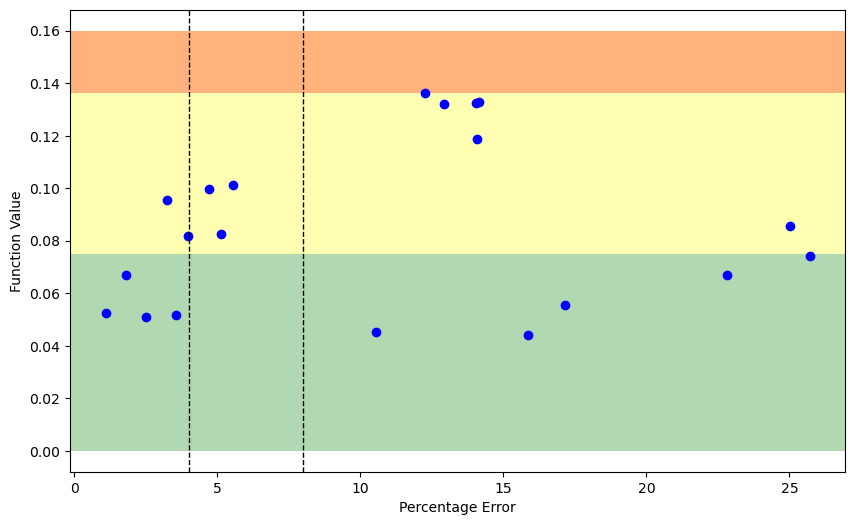

In [208]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Reshape x to a 2D array
x_reshaped = x.values.reshape(-1, 1)  # Convert x to a 2D array (n, 1)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(x_reshaped, y)

# Get the slope (coefficient) and intercept
slope = model.coef_[0]  # model.coef_ gives the slope of the line
intercept = model.intercept_  # model.intercept_ gives the intercept


# Plot the data points and the regression line
plt.figure(figsize=(10, 6))
ax = plt.gca()

# Adding colored regions
ax.axhspan(0, 0.075, facecolor='green', alpha=0.3)
ax.axhspan(0.075, 0.16, facecolor='yellow', alpha=0.3)
ax.axhspan(0.16, max(y), facecolor='red', alpha=0.3)

# Add vertical lines at x = 4 and x = 10
ax.axvline(x=4, color='black', linestyle='--', linewidth=1)
ax.axvline(x=8, color='black', linestyle='--', linewidth=1)

plt.scatter(x, y, color='blue', label='Data points')
# plt.plot(x, y_pred, color='red', label='Regression Line')
# plt.title(f'Scatter Plot of x vs y with Linear Regression Line\n{param}')
plt.xlabel('Percentage Error')
plt.ylabel('Function Value')
# plt.grid()

# for i in range(len(x)):
#     plt.annotate(f"{x.iloc[i]:.2f}", (x.iloc[i], y.iloc[i]), textcoords="offset points", xytext=(5,5), ha='right', fontsize=9)

# Add text box with metrics

plt.show()


### Results

1. Ion_C * EN_A * Sum_ion * Abs_diff_ion * Ion_A^(-1) * EN_C^(-1) * Sum_EN^(-1) * Abs_diff_EN^(-1) 

### Task

1. Check liturature for binary battery materials , check umbd paper

2. Test for more ionic compounds

Problem with D3(S) they only applied for molecular systems. Periodic systems are missing. We can include these periodic systems.

In [209]:
import pandas as pd

# Convert your data to a DataFrame
df = pd.DataFrame(filtered_expressions)

# Assuming the column `1` contains lists of numbers
# Expand the column with lists into separate columns
expanded_columns = pd.DataFrame(df[1].tolist())

# Concatenate the expanded columns back with the rest of the DataFrame
df = pd.concat([df.drop(columns=[1]), expanded_columns], axis=1)

df = df.T

df.columns = df.iloc[0]  # Set the first row as column names
df = df[1:]  # Drop the first row since it's now the header

df.shape


res = pd.Series(res)
res.shape

(20,)

In [210]:
X=df
y=res

In [211]:
X, y

(0  Sum_radV Sum_radV Sqrt_Sum_pol Sqrt_Sum_pol Sum_radV^(-1) Sum_radV^(-1)  \
 0      98.5     98.5    13.071534    13.071534      0.010152      0.010152   
 1     109.5    109.5    13.017872    13.017872      0.009132      0.009132   
 2     130.0    130.0    17.218159    17.218159      0.007692      0.007692   
 3     137.0    137.0     18.07111     18.07111      0.007299      0.007299   
 4     148.0    148.0    20.183285    20.183285      0.006757      0.006757   
 5     215.0    215.0    20.554805    20.554805      0.004651      0.004651   
 6     165.5    165.5    13.638182    13.638182      0.006042      0.006042   
 7     189.0    189.0     9.790301     9.790301      0.005291      0.005291   
 8     130.5    130.5    13.027279    13.027279      0.007663      0.007663   
 9     162.0    162.0     8.232254     8.232254      0.006173      0.006173   
 10    118.5    118.5     7.934104     7.934104      0.008439      0.008439   
 11    129.5    129.5    13.116783    13.116783     

In [212]:
X.shape, y.shape

((20, 16), (20,))

In [213]:
import numpy as np

y_log = np.log1p(y)  # Apply log transformation to stabilize variance

y_log

0     2.716898
1     2.713460
2     2.710332
3     2.633770
4     2.585666
5     1.442377
6     1.811775
7     1.520371
8     1.743250
9     1.252756
10    1.031508
11    1.881028
12    2.898360
13    3.259141
14    3.170297
15    3.285390
16    2.447023
17    2.824794
18    0.740172
19    1.602701
dtype: float64

In [214]:
q1 = y.quantile(0.25)
q3 = y.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

y_filtered = y[(y >= lower_bound) & (y <= upper_bound)]

y_filtered


0     14.133308
1     14.081370
2     14.034265
3     12.926169
4     12.272122
5      3.230739
6      5.121300
7      3.573920
8      4.715887
9      2.499976
10     1.805294
11     5.560246
12    17.144356
13    25.027178
14    22.814559
15    25.719393
16    10.553895
17    15.857470
18     1.096295
19     3.966428
dtype: float64

In [215]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale features


In [216]:
X_scaled

array([[-1.38506069, -1.38506069, -0.32920897, -0.32920897,  2.09452279,
         2.09452279,  0.0341384 ,  0.0341384 , -1.00755885, -1.37350663,
        -1.18665146, -1.38520328,  1.5225179 , -0.3282726 ,  1.33457473,
         0.20344653],
       [-1.20518268, -1.20518268, -0.34214949, -0.34214949,  1.57011523,
         1.57011523,  0.04761442,  0.04761442, -0.91119963, -1.19881494,
        -1.01083697, -1.2052999 ,  1.07814872, -0.34146091,  1.00621698,
         0.17402908],
       [-0.86995547, -0.86995547,  0.67075143,  0.67075143,  0.82961875,
         0.82961875, -0.75317191, -0.75317191, -0.34321877, -0.80462515,
        -1.18369932, -0.87034149,  1.51420517,  0.67123444, -0.10710398,
        -0.66857737],
       [-0.75548765, -0.75548765,  0.87644081,  0.87644081,  0.62752135,
         0.62752135, -0.87031502, -0.87031502, -0.17735894, -0.67930057,
        -1.17747935, -0.75590563,  1.49679635,  0.87685781, -0.29429139,
        -0.79945318],
       [-0.57560964, -0.57560964,  1

In [217]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error
import pandas as pd

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2,random_state=21)

# Train model
model = LinearRegression()
model.fit(X_train, y_train)


# Predict
y_pred = model.predict(X_test)

print( y_test, y_pred)


# Compute MAPE
mape = mean_absolute_percentage_error(y_test, y_pred) * 100  # MAPE in percentage

print(f"Mean Absolute Percentage Error (MAPE): {mape:.2f}%")

# Get feature importance (coefficients for linear regression)
features = X.columns  # Feature names
coefficients = model.coef_

# Combine into a dictionary
importance_dict = {feature: coef for feature, coef in zip(features, coefficients)}

# Sort by importance
sorted_importances = sorted(importance_dict.items(), key=lambda x: abs(x[1]), reverse=True)


7      3.573920
10     1.805294
19     3.966428
13    25.027178
dtype: float64 [ 2.15630697 43.24194249  6.62507312  9.62080928]
Mean Absolute Percentage Error (MAPE): 615.88%


In [218]:
# Get intercept (β0)
intercept = model.intercept_

# Get coefficients (β1, β2, ..., βn)
coefficients = model.coef_

# Combine features and coefficients into a dictionary
coef_dict = {feature: coef for feature, coef in zip(X.columns, coefficients)}

# Sort coefficients in descending order based on absolute value
sorted_coefs = sorted(coef_dict.items(), key=lambda x: abs(x[1]), reverse=True)

# Construct the equation
equation = f"y = {intercept:.4f}"
for feature, coef in sorted_coefs:
    equation += f" + ({coef:.4f} * {feature}) \n"

print("Sorted Regression Equation:")
print(equation)


Sorted Regression Equation:
y = 12.1703 + (322.5225 * Sum_radV^(-1) * Sqrt_Sum_pol^(-1)) 
 + (254.8658 * Sum_radV * Sqrt_Sum_pol) 
 + (236.1282 * Sqrt_Sum_pol * Sum_radV^(-1)) 
 + (-191.3393 * Sum_radV^(-1)) 
 + (164.9038 * Sum_radV * Sqrt_Sum_pol^(-1)) 
 + (-120.0656 * Sum_radV^(-1) + Sqrt_Sum_pol^(-1)) 
 + (-106.9740 * Sqrt_Sum_pol^(-1)) 
 + (-103.1953 * Sqrt_Sum_pol + Sum_radV^(-1)) 
 + (-103.0911 * Sqrt_Sum_pol) 
 + (-75.4586 * Sum_radV + Sqrt_Sum_pol) 
 + (-70.3780 * Sum_radV + Sqrt_Sum_pol^(-1)) 
 + (-70.3292 * Sum_radV) 



In [219]:
from sklearn.preprocessing import StandardScaler
data = [[10, -1], [10, -1], [20, 1], [20, 1]]
scaler = StandardScaler()
print(scaler.fit(data))
print(scaler.mean_)
print(scaler.transform(data))
print(scaler.transform([[-1, -1],[3,3]]))

StandardScaler()
[15.  0.]
[[-1. -1.]
 [-1. -1.]
 [ 1.  1.]
 [ 1.  1.]]
[[-3.2 -1. ]
 [-2.4  3. ]]
